# Token Benchmark Example Analysis
The following is an example of the analysis that can be done on individual responses that are saved when running `token_benchmark_ray.py` with the flag `--results-dir` which enables the saving of all responses.

In [18]:
import json
import pandas as pd
import glob

In [19]:
# Use glob to find all JSON files in the directory
file_paths = glob.glob('/workspace/llmperf/result_outputs/meta-llama-3-2-11b-vision-instruct*summary.json')
#file_paths = glob.glob('/workspace/llmperf/result_outputs/meta-llama-3-1-8b-instruct*summary.json')
# Load the JSON data
data_list = [json.load(open(file_path, 'r')) for file_path in file_paths]

# Create a DataFrame with multiple rows and multiple columns
df = pd.DataFrame(data_list)

In [20]:
valid_df = df.sort_values(by="num_concurrent_requests", ascending=True)
valid_df

,version,name,model,mean_input_tokens,stddev_input_tokens,mean_output_tokens,stddev_output_tokens,num_concurrent_requests,results_inter_token_latency_s_quantiles_p25,results_inter_token_latency_s_quantiles_p50,...,results_number_output_tokens_max,results_number_output_tokens_stddev,results_num_requests_started,results_error_rate,results_number_errors,results_error_code_frequency,results_mean_output_throughput_token_per_s,results_num_completed_requests,results_num_completed_requests_per_min,timestamp
7,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_1_su...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,1,0.015118,0.016053,...,38,10.036046,10,0.0,0,{},50.182830,10,133.820881,1733663532
2,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_2_su...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,2,0.015430,0.016512,...,176,53.175578,20,0.0,0,{},82.020742,20,98.032759,1733663544
0,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_4_su...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,4,0.016284,0.018060,...,163,45.581647,40,0.0,0,{},116.251878,40,159.158304,1733663559
5,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_8_su...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,8,0.017518,0.019169,...,194,47.473217,80,0.0,0,{},168.107919,80,218.321972,1733663582
6,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_16_s...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,16,0.018367,0.021413,...,203,53.400492,160,0.0,0,{},293.140003,160,334.380231,1733663610
1,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_32_s...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,32,0.025244,0.030963,...,210,48.537274,320,0.0,0,{},393.094317,320,493.552896,1733663650
4,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_64_s...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,64,0.032457,0.055397,...,196,49.245429,640,0.0,0,{},442.292541,640,530.535519,1733663722
3,2023-08-31,meta-llama-3-2-11b-vision-instruct_64_128_128_...,meta/llama-3.2-11b-vision-instruct,64,8,128,8,128,0.049554,0.111886,...,211,49.744977,1280,0.0,0,{},470.325190,1280,565.946581,1733663858


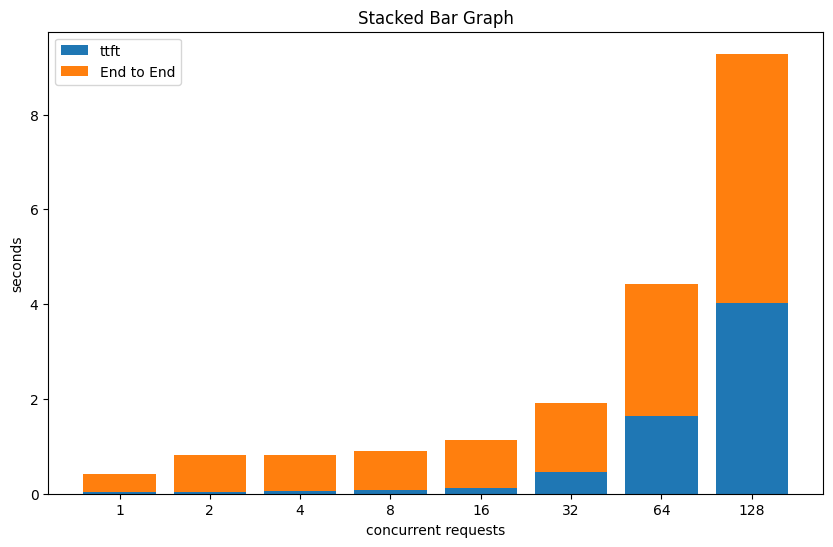

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a stacked bar graph
plt.figure(figsize=(10, 6))
plt.bar(valid_df["num_concurrent_requests"].astype(str), valid_df["results_ttft_s_mean"], label='ttft')
plt.bar(valid_df["num_concurrent_requests"].astype(str), valid_df['results_end_to_end_latency_s_mean'], bottom=valid_df["results_ttft_s_mean"], label='End to End')
plt.xlabel('concurrent requests')
plt.ylabel('seconds')
plt.title('Stacked Bar Graph')
plt.legend()
plt.show()

(0.0, 12.0)

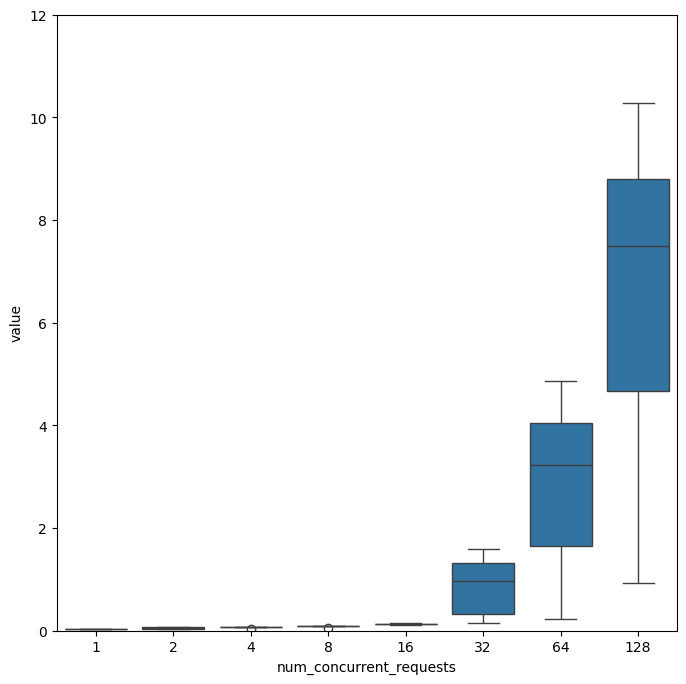

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

data = valid_df[['num_concurrent_requests','results_ttft_s_quantiles_p25','results_ttft_s_quantiles_p50','results_ttft_s_quantiles_p75','results_ttft_s_quantiles_p90','results_ttft_s_quantiles_p95','results_ttft_s_quantiles_p99']]
percentiles_melted = pd.melt(data, id_vars=['num_concurrent_requests'], var_name='percentile', value_name='value')
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(x='num_concurrent_requests', y='value', data=percentiles_melted, ax=ax)
ax.set_ylim(0, 12)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.2f}".format(x)))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, loc: str(x)))

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the data
plt.plot(valid_df["num_concurrent_requests"], df['H100 SXM'], label='H100 SXM')
plt.plot(valid_df["num_concurrent_requests"], df['A100'], label='A100')

# Customize the plot
plt.xlabel('Concurrent Requests')
plt.ylabel('TTFT as a Percent of Total Generation Time')
plt.title('TTFT as a Percent of Total Generation Time')
plt.legend()

# Show the plot
plt.show()

KeyError: 'H100 SXM'